# PyTorch基础

## 前言

PyTorch是2018年GitHub增长最快的项目之一。

深度学习神经网络的框架如果说之前是TensorFlow, Keras, Theano, Caffe, CNTK, PyTorch, MXNET等百家争鸣，现在已经发展到Google的TensorFlow (Keras被TensorFlow收入囊中)与Facebook的PyTorch双雄争霸的局面。

网友表示，这就像现实版的 “Mac 和 PC 之争”（PyTorch 是 Mac）。

有关TensorFlow与PyTorch之争的文章，参见：[TensorFlow 2.0和PyTorch谁更好？大牛们争了好几天](https://blog.csdn.net/yH0VLDe8VG8ep9VGe/article/details/82976191)

PyTorch现在已经发布了1.0正式版：
<img src='./image/pytorch.jpeg' />

PyTorch的官方文档：[PyTorch中文文档](https://pytorch-cn.readthedocs.io/zh/latest/)

PyTorch的[官方网站](https://pytorch.org/)

<img src='./image/pytorchinstall.png' />

本文是基于GitHub上的[PyTorch Book](https://github.com/chenyuntc/pytorch-book)的第二章：快速入门编写的，因为这篇文档的jupyter笔记文件，作者在文件名加入了冒号(:)，以至于无法在Windows平台正常下载。（Mac下可正常下载与使用），此文的目的是弥补这个遗憾。

## PyTorch第一步

PyTorch的简洁设计使得它入门很简单，在深入介绍PyTorch之前，本节将先介绍一些PyTorch的基础知识，使得读者能够对PyTorch有一个大致的了解，并能够用PyTorch搭建一个简单的神经网络。部分内容读者可能暂时不太理解，可先不予以深究。

既然都已经开始神经网络应用了，那么假定读者已经掌握了Numpy的基础应用。

### Tensor

Tensor是PyTorch中重要的数据结构，可认为是一个高维数组。它可以是一个数（标量）、一维数组（向量）、二维数组（矩阵）以及更高维的数组。

Tensor和Numpy的ndarrays类似，但Tensor可以使用GPU进行加速。

Tensor的使用和Numpy及Matlab的接口十分相似，下面通过几个例子来看看Tensor的基本使用。

In [1]:
import torch as t
t.__version__

'1.0.1'

构建5x3矩阵，只是分配空间，未初始化

In [2]:
x = t.Tensor(5, 3)
print(x)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.8890e-42, 0.0000e+00],
        [0.0000e+00, 1.7704e+31, 0.0000e+00]])


下面，我们用数字数组构建一个2x2的矩阵：

In [3]:
x = t.Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


使用```[0,1]```均匀分布随机初始化二维数组

In [4]:
x = t.rand(5, 3)
print(x)

tensor([[0.6869, 0.2421, 0.5610],
        [0.5947, 0.4914, 0.1517],
        [0.9055, 0.2603, 0.9848],
        [0.5783, 0.0239, 0.4172],
        [0.5441, 0.5163, 0.6383]])


In [5]:
print('查看x的形状')
print(x.size())
print('查看列的个数，两种写法等价')
print(x.size()[1], x.size(1))

查看x的形状
torch.Size([5, 3])
查看列的个数，两种写法等价
3 3


torch.Size是tuple对象的子类，因此其支持tuple的所有操作，如x.size()[0]

矩阵加法

In [6]:
y = t.rand(5, 3)
print('x')
print(x)
print('y')
print(y)
print('x+y')
print(x + y)

x
tensor([[0.6869, 0.2421, 0.5610],
        [0.5947, 0.4914, 0.1517],
        [0.9055, 0.2603, 0.9848],
        [0.5783, 0.0239, 0.4172],
        [0.5441, 0.5163, 0.6383]])
y
tensor([[0.5530, 0.8533, 0.2583],
        [0.6763, 0.3558, 0.0465],
        [0.7478, 0.5108, 0.7239],
        [0.6035, 0.8471, 0.8104],
        [0.1674, 0.6108, 0.3192]])
x+y
tensor([[1.2399, 1.0954, 0.8193],
        [1.2710, 0.8471, 0.1982],
        [1.6533, 0.7710, 1.7087],
        [1.1819, 0.8709, 1.2276],
        [0.7115, 1.1271, 0.9575]])


随机数是深度学习中很关键的基础，为什么？自行百度吧。

设置pytorch的Tensor种子数

In [7]:
t.manual_seed(100)
print(t.initial_seed())

100


下面通过不同的种子数，分别获取x与y，并确保每次执行，x与y的值不会发生变化

In [8]:
t.manual_seed(100)
x= t.rand(5, 3)
print('x')
print(x)
t.manual_seed(95)
y = t.rand(5, 3)
print('y')
print(y)
print('x+y')
print(x + y)

x
tensor([[0.1117, 0.8158, 0.2626],
        [0.4839, 0.6765, 0.7539],
        [0.2627, 0.0428, 0.2080],
        [0.1180, 0.1217, 0.7356],
        [0.7118, 0.7876, 0.4183]])
y
tensor([[0.5737, 0.1411, 0.8161],
        [0.8392, 0.9081, 0.9018],
        [0.0450, 0.4321, 0.4437],
        [0.2886, 0.5823, 0.0332],
        [0.4048, 0.3298, 0.4143]])
x+y
tensor([[0.6854, 0.9569, 1.0787],
        [1.3231, 1.5846, 1.6557],
        [0.3077, 0.4749, 0.6518],
        [0.4066, 0.7040, 0.7688],
        [1.1166, 1.1174, 0.8326]])


加法的第二种写法

In [9]:
print(t.add(x, y))

tensor([[0.6854, 0.9569, 1.0787],
        [1.3231, 1.5846, 1.6557],
        [0.3077, 0.4749, 0.6518],
        [0.4066, 0.7040, 0.7688],
        [1.1166, 1.1174, 0.8326]])


加法的第三种写法：指定加法结果的输出目标为result

In [10]:
result = t.Tensor(5, 3) # 预先分配空间
t.add(x, y, out=result) # 输入到result
print(result)

tensor([[0.6854, 0.9569, 1.0787],
        [1.3231, 1.5846, 1.6557],
        [0.3077, 0.4749, 0.6518],
        [0.4066, 0.7040, 0.7688],
        [1.1166, 1.1174, 0.8326]])


基于tensor变量做加法

>注意，函数名后面带下划线_ 的函数会修改Tensor本身。<br>例如，x.add_(y)和x.t_()会改变 x，但x.add(y)和x.t()返回一个新的Tensor， 而x不变。

In [11]:
print('最初y')
t.manual_seed(95)
y = t.rand(5, 3)
print(y)

print('第一种加法，y的结果')
print(y.add(x)) # 普通加法，不改变y的内容
print('y')
print(y)

print('第二种加法，y的结果')
print(y.add_(x)) # inplace 加法，y变了
print('y')
print(y)

最初y
tensor([[0.5737, 0.1411, 0.8161],
        [0.8392, 0.9081, 0.9018],
        [0.0450, 0.4321, 0.4437],
        [0.2886, 0.5823, 0.0332],
        [0.4048, 0.3298, 0.4143]])
第一种加法，y的结果
tensor([[0.6854, 0.9569, 1.0787],
        [1.3231, 1.5846, 1.6557],
        [0.3077, 0.4749, 0.6518],
        [0.4066, 0.7040, 0.7688],
        [1.1166, 1.1174, 0.8326]])
y
tensor([[0.5737, 0.1411, 0.8161],
        [0.8392, 0.9081, 0.9018],
        [0.0450, 0.4321, 0.4437],
        [0.2886, 0.5823, 0.0332],
        [0.4048, 0.3298, 0.4143]])
第二种加法，y的结果
tensor([[0.6854, 0.9569, 1.0787],
        [1.3231, 1.5846, 1.6557],
        [0.3077, 0.4749, 0.6518],
        [0.4066, 0.7040, 0.7688],
        [1.1166, 1.1174, 0.8326]])
y
tensor([[0.6854, 0.9569, 1.0787],
        [1.3231, 1.5846, 1.6557],
        [0.3077, 0.4749, 0.6518],
        [0.4066, 0.7040, 0.7688],
        [1.1166, 1.1174, 0.8326]])


Tensor的选取操作与Numpy类似

In [12]:
print('x')
print(x)
print('获取前两行：x[:2]')
print(x[:2])
print('x[:,2]')
print('获取索引为2的列，即第三列：x[:, 2]')
print(x[:, 2])
print('获取第一行第一列成员')
print(x[0][0])
print('获取第一行第一列成员的浮点值')
print(x[0][0].item())

x
tensor([[0.1117, 0.8158, 0.2626],
        [0.4839, 0.6765, 0.7539],
        [0.2627, 0.0428, 0.2080],
        [0.1180, 0.1217, 0.7356],
        [0.7118, 0.7876, 0.4183]])
获取前两行：x[:2]
tensor([[0.1117, 0.8158, 0.2626],
        [0.4839, 0.6765, 0.7539]])
x[:,2]
获取索引为2的列，即第三列：x[:, 2]
tensor([0.2626, 0.7539, 0.2080, 0.7356, 0.4183])
获取第一行第一列成员
tensor(0.1117)
获取第一行第一列成员的浮点值
0.1116642951965332


Tensor还支持很多操作，包括数学运算、线性代数、选择、切片等等，其接口设计与Numpy极为相似。

Tensor和Numpy的数组之间的互操作非常容易且快速。对于Tensor不支持的操作，可以先转为Numpy数组处理，之后再转回Tensor。

新建一个全1的Tensor

In [13]:
a = t.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


将Tensor转为numpy对象

In [14]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


Numpy对象转为Tensor

In [15]:
import numpy as np
a = np.ones(5)
b = t.from_numpy(a)
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


Tensor和numpy对象共享内存，所以他们之间的转换很快，而且几乎不会消耗什么资源。但这也意味着，如果其中一个变了，另外一个也会随之改变。

In [16]:
b.add_(1)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


如果你想获取某一个元素的值，可以使用scalar.item。 Scalar，即标量

直接tensor[idx]得到的还是一个tensor: 一个0-dim 的tensor，一般称为scalar.

In [17]:
scalar = b[0]
print(scalar)

tensor(2., dtype=torch.float64)


In [18]:
print(scalar.size())

torch.Size([])


In [19]:
print(scalar.item())

2.0


In [20]:
tensor = t.tensor([2])
print('tensor')
print(tensor)
print('scalar')
print(scalar)

tensor
tensor([2])
scalar
tensor(2., dtype=torch.float64)


In [21]:
print('tensor size')
print(tensor.size())
print('scalar size')
print(scalar.size())

tensor size
torch.Size([1])
scalar size
torch.Size([])


只有一个元素的tensor也可以调用```tensor.item()```

In [22]:
print(tensor.item())

2


此外在pytorch中还有一个和np.array 很类似的接口: torch.tensor, 二者的使用十分类似。

In [23]:
tensor = t.tensor([3, 4]) # 新建一个包含3, 4两个元素的tensor
print(tensor)

tensor([3, 4])


In [24]:
scalar = t.tensor(3)
print(scalar)

tensor(3)


In [25]:
old_tensor = tensor
new_tensor = t.tensor(old_tensor)
new_tensor[0] = 1111
print('old tensor: {0}'.format(old_tensor))
print('new tensor: {0}'.format(new_tensor))

old tensor: tensor([3, 4])
new tensor: tensor([1111,    4])


c:\python3.6\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


需要注意的是，t.tensor()总是会进行数据拷贝，新tensor和原来的数据不再共享内存。

所以如果你想共享内存的话，建议使用torch.from_numpy()或者tensor.detach()来新建一个tensor, 二者共享内存。

In [26]:
new_tensor = old_tensor.detach()
new_tensor[0] = 1111
print('old tensor: {0}'.format(old_tensor))
print('new tensor: {0}'.format(new_tensor))

old tensor: tensor([1111,    4])
new tensor: tensor([1111,    4])


Tensor可通过.cuda 方法转为GPU的Tensor，从而享受GPU带来的加速运算。

In [28]:
# 在不支持CUDA的机器下，下一步还是在CPU上运行
device = t.device("cuda:0" if t.cuda.is_available() else "cpu")
print(device)
x = x.to(device)
y = y.to(device)
z = x+y
print(z)

cuda:0
tensor([[0.7970, 1.7728, 1.3413],
        [1.8070, 2.2611, 2.4096],
        [0.5704, 0.5178, 0.8598],
        [0.5246, 0.8257, 1.5044],
        [1.8284, 1.9050, 1.2509]], device='cuda:0')


此外，还可以使用tensor.cuda() 的方式将tensor拷贝到gpu上，但是这种方式不太推荐。

此处可能发现GPU运算的速度并未提升太多，这是因为x和y太小且运算也较为简单，而且将数据从内存转移到显存还需要花费额外的开销。

GPU的优势需在大规模数据和复杂运算下才能体现出来。

### autograd: 自动微分

深度学习的算法本质上是通过反向传播求导数，而PyTorch的autograd模块则实现了此功能。

在Tensor上的所有操作，autograd都能为它们自动提供微分，避免了手动计算导数的复杂过程。

从0.4起, Variable 正式合并入Tensor。

Variable 本来实现的自动微分功能，Tensor就能支持。

读者还是可以使用Variable(tensor), 但是这个操作其实什么都没做。建议读者以后直接使用tensor.

要想使得Tensor使用autograd功能，只需要设置tensor.requries_grad=True.

In [29]:
# 为tensor设置 requires_grad 标识，代表着需要求导数
# pytorch 会自动调用autograd 记录操作
x = t.ones(2, 2, requires_grad=True)
print(x)
# 上一步等价于
# x = t.ones(2,2)
# x.requires_grad = True

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [30]:
y = x.sum()
print(y)

tensor(4., grad_fn=<SumBackward0>)


In [31]:
print(y.grad_fn)

In [32]:
for i in range(5):
    y.backward() # 反向传播，计算梯度
    print('第{0}次反向传播，梯度为：{1}'.format(i + 1, x.grad))

第1次反向传播，梯度为：tensor([[1., 1.],
        [1., 1.]])
第2次反向传播，梯度为：tensor([[2., 2.],
        [2., 2.]])
第3次反向传播，梯度为：tensor([[3., 3.],
        [3., 3.]])
第4次反向传播，梯度为：tensor([[4., 4.],
        [4., 4.]])
第5次反向传播，梯度为：tensor([[5., 5.],
        [5., 5.]])


In [33]:
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


注意：grad在反向传播过程中是累加的(accumulated)。

这意味着每一次运行反向传播，梯度都会累加之前的梯度，所以反向传播之前需把梯度清零。

In [34]:
# 清零梯度
print(x.grad.data.zero_())

tensor([[0., 0.],
        [0., 0.]])


之后，再反向传播，即可重新计算梯度

In [35]:
y.backward()
print(x.grad)

tensor([[1., 1.],
        [1., 1.]])


### 神经网络

Autograd实现了反向传播功能，但是直接用来写深度学习的代码在很多情况下还是稍显复杂。

torch.nn是专门为神经网络设计的模块化接口。

nn构建于 Autograd之上，可用来定义和运行神经网络。

nn.Module是nn中最重要的类，可把它看成是一个网络的封装，包含网络各层定义以及forward方法，调用forward(input)方法，可返回前向传播的结果。

下面就以最早的卷积神经网络：LeNet为例，来看看如何用nn.Module实现。LeNet的网络结构如图所示：

此卷积神经网络，我们在[以Keras为例的神经网络模型](./24.%20Neural%20Network%20Introduction.ipynb)已经做了非常详细的阐述，这里我们主要看PyTorch的实现方式

<img src='./image/lenet5.png' />

LeNet每一层特征具现化：

<img src='./image/lenet57_1.png' />

这是一个基础的前向传播(feed-forward)网络: 接收输入，经过层层传递运算，得到输出。

#### 定义网络

定义网络时，需要继承nn.Module，并实现它的forward方法，把网络中具有可学习参数的层放在构造函数__init__中。

如果某一层(如ReLU)不具有可学习的参数，则既可以放在构造函数中，也可以不放，但建议不放在其中，而在forward中使用nn.functional代替。

下面的代码，我们只使用了两个卷积层，三个全连接层，最后一层nn.Linear(84, 10)表示10分类

In [36]:
import torch.nn as nn
import torch.nn.functional as F

nn.Conv2d的参数：
```
 |  Args:
 |      in_channels (int): Number of channels in the input image
 |      out_channels (int): Number of channels produced by the convolution
 |      kernel_size (int or tuple): Size of the convolving kernel
 |      stride (int or tuple, optional): Stride of the convolution. Default: 1
 |      padding (int or tuple, optional): Zero-padding added to both sides of the input. Default: 0
 |      dilation (int or tuple, optional): Spacing between kernel elements. Default: 1
 |      groups (int, optional): Number of blocked connections from input channels to output channels. Default: 1
 |      bias (bool, optional): If ``True``, adds a learnable bias to the output. Default: ``True``
 ```

下文的代码示例，没有使用torch.nn.Sequential，虽然下面的代码看起来粗糙一些，但是与原始算法的构建更贴切

In [37]:
class Net(nn.Module):
    def __init__(self):
        # nn.Module子类的函数必须在构造函数中执行父类的构造函数
        # 下式等价于nn.Module.__init__(self)
        super(Net, self).__init__()
        
        # 卷积层 '1'表示输入图片为单通道, '6'表示输出通道数，'5'表示卷积核为5*5
        self.conv1 = nn.Conv2d(1, 6, 5) 
        # 卷积层
        self.conv2 = nn.Conv2d(6, 16, 5) 
        # 仿射层/全连接层，y = Wx + b
        self.fc1   = nn.Linear(16*5*5, 120) 
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x): 
        # 卷积 -> 激活 -> 池化 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        # reshape，‘-1’表示自适应
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


<b><font color='red'>只要在nn.Module的子类中定义了forward函数，backward函数就会自动被实现(利用autograd)。</font></b>

在forward 函数中可使用任何tensor支持的函数，还可以使用if、for循环、print、log等Python语法，写法和标准的Python写法一致。

网络的可学习参数通过net.parameters()返回，net.named_parameters可同时返回可学习的参数及名称。

In [38]:
params = list(net.parameters())
print(len(params))

10


In [39]:
for name, parameters in net.named_parameters():
    print(name,':',parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


forward函数的输入和输出都是Tensor。

In [40]:
# Samples x Channels x Height x Width
t.manual_seed(100)
input = t.randn(1, 1, 32, 32)
print('input: {0}'.format(input))
print('input size: {0}'.format(input.size()))
out = net(input)
print('out size: {0}'.format(out.size()))

input: tensor([[[[ 0.1268,  1.3564,  0.5632,  ..., -1.7736, -0.2205,  2.7467],
          [-1.7599,  1.0230, -0.1107,  ..., -0.8043, -0.6244, -0.5882],
          [ 1.6700, -0.9275, -0.9759,  ...,  0.2521,  0.6541,  2.1024],
          ...,
          [-0.6924, -0.4866, -0.1484,  ..., -0.3634, -0.4904, -1.2284],
          [ 0.0528, -0.6355, -0.3881,  ...,  1.4351, -0.9121,  0.7485],
          [-1.3633,  0.6923,  0.0092,  ...,  0.5204, -0.9783, -0.3428]]]])
input size: torch.Size([1, 1, 32, 32])
out size: torch.Size([1, 10])


In [41]:
net.zero_grad() # 所有参数的梯度清零
out.backward(t.ones(1,10)) # 反向传播

需要注意的是，torch.nn只支持mini-batches，不支持一次只输入一个样本，即一次必须是一个batch。

但如果只想输入一个样本，则用 input.unsqueeze(0)将batch_size设为１。

例如 nn.Conv2d 输入必须是4维的，形如$nSamples \times nChannels \times Height \times Width$。可将nSample设为1，即$1 \times nChannels \times Height \times Width$。

#### 损失函数

nn实现了神经网络中大多数的损失函数。

例如nn.MSELoss用来计算均方误差。

nn.CrossEntropyLoss用来计算交叉熵损失。

还记得在之前说的么：

采用交叉熵为损失函数，因为其是凸函数，只有凸函数才有可能得到全局最优解。 

如果采用Sigmoid作为激活函数，则MSE（均方差）为非凸函数，易陷入局部最优。 

此外，MSE比交叉熵容易出现梯度弥散，根据计算MSE的梯度一般是交叉熵的1/4或者更小

还有更重要的总结：
<br><b><font color='red'>
PyTorch的MSE用于做回归的，因为目标参数，即yhat只能为浮点型: torch.float
<br>
PyTorch的交叉熵用于做分类的，因为目标参数，即yhat只能为长整型: torch.long
</font></b>

##### MSE作为损失函数

MSE的target必须与output的分类数目一致, 否则会报如下错误：
<br>The size of tensor a (10) must match the size of tensor b (5) at non-singleton dimension 1

In [42]:
output = net(input)
print('output size: {0}'.format(output.size()))
# 注意t.arange(0., 10.)的写法，如果写为t.arange(0, 10)，则会报如下错误：
# Expected object of scalar type Float but got scalar type Long for argument #2 'target'
# print(t.arange(0., 10.))
# target = t.arange(0.,10.).view(1,10) 
target = t.empty(10, dtype=t.float).random_(10)
print(target)
criterion = nn.MSELoss()
loss = criterion(output, target)
print(loss, loss.item()) # loss是个scalar

output size: torch.Size([1, 10])
tensor([9., 1., 7., 5., 6., 7., 5., 7., 5., 0.])
tensor(33.9477, grad_fn=<MseLossBackward>) 33.947723388671875


如果对loss进行反向传播溯源(使用gradfn属性)，可看到它的计算图如下：
```
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d  
      -> view -> linear -> relu -> linear -> relu -> linear 
      -> MSELoss
      -> loss
```
当调用loss.backward()时，该图会动态生成并自动微分，也即会自动计算图中参数(Parameter)的导数。

In [43]:
# 运行.backward，观察调用之前和调用之后的grad
net.zero_grad() # 把net中所有可学习参数的梯度清零
print('反向传播之前 conv1.bias的梯度')
print(net.conv1.bias.grad)
loss.backward()
print('反向传播之后 conv1.bias的梯度')
print(net.conv1.bias.grad)

反向传播之前 conv1.bias的梯度
tensor([0., 0., 0., 0., 0., 0.])
反向传播之后 conv1.bias的梯度
tensor([ 0.0211, -0.0390, -0.1102,  0.0096,  0.0166, -0.0149])


##### CrossEntropy(交叉熵)作为损失函数

- PyTorch中的交叉熵使用，其target参数的size必须与batch-size大小一致，否则会报类似异常：
```
ValueError: Expected input batch_size (5) to match target batch_size (4).
```
- target设置的值，如果是10分类，必须在0~9之间，否则会报如下异常：
```
RuntimeError: Assertion `cur_target >= 0 && cur_target < n_classes' failed.  at d:\build\pytorch\pytorch-1.0\aten\src\thnn\generic\classnllcriterion.c:93
```
- 交叉熵的target参数，必须为t.long类型，否则会报错

In [44]:
# batch-size x Channels x Height x Width
t.manual_seed(88)
inputbatchsize5 = t.randn(5, 1, 32, 32)
print('input size: {0}'.format(inputbatchsize5.size()))
netforcross = Net()
outputforcross = netforcross(inputbatchsize5)
print('output size: {0}'.format(outputforcross.size()))
targetforcross = t.empty(5, dtype=t.long).random_(10)
print('target: {0}, size: {1}'.format(targetforcross, targetforcross.size()))
criterionforcross = nn.CrossEntropyLoss()
lossforcross = criterionforcross(outputforcross, targetforcross)
print(lossforcross, lossforcross.item()) # loss是个scalar

input size: torch.Size([5, 1, 32, 32])
output size: torch.Size([5, 10])
target: tensor([4, 8, 6, 2, 1]), size: torch.Size([5])
tensor(2.3091, grad_fn=<NllLossBackward>) 2.309054374694824


In [45]:
# 运行.backward，观察调用之前和调用之后的grad
netforcross.zero_grad() # 把net中所有可学习参数的梯度清零
print('反向传播之前 conv1.bias的梯度')
print(netforcross.conv1.bias.grad)
lossforcross.backward()
print('反向传播之后 conv1.bias的梯度')
print(netforcross.conv1.bias.grad)

反向传播之前 conv1.bias的梯度
None
反向传播之后 conv1.bias的梯度
tensor([ 0.0051, -0.0045,  0.0044,  0.0038,  0.0018,  0.0060])


#### 优化器

在反向传播计算完所有参数的梯度后，还需要使用优化方法来更新网络的权重和参数。

例如随机梯度下降法(SGD)的更新策略如下：
```
weight = weight - learning_rate * gradient
```
手动实现如下：

In [46]:
# batch-size x Channels x Height x Width
print('Initial net begin')
t.manual_seed(88)
inputbatchsize5 = t.randn(5, 1, 32, 32)
print('input size: {0}'.format(inputbatchsize5.size()))
netforcross = Net()
outputforcross = netforcross(inputbatchsize5)
print('output size: {0}'.format(outputforcross.size()))
targetforcross = t.empty(5, dtype=t.long).random_(10)
print('target: {0}, size: {1}'.format(targetforcross, targetforcross.size()))
criterionforcross = nn.CrossEntropyLoss()
print('Initial net end')

learning_rate = 0.01
epochs = 100
print('通过手动实现SGD: weight = weight - learning_rate * gradient')
for epoch in range(epochs):
    netforcross.zero_grad() # 把net中所有可学习参数的梯度清零
    outputforcross = netforcross(inputbatchsize5)
    lossforcross = criterionforcross(outputforcross, targetforcross)
    print('Train epoch: {0}, loss value: {1}'.format(epoch + 1, lossforcross.item())) # loss是个scalar
    lossforcross.backward()
    # 以下代码相当于optimizer.step()
    for index, f in enumerate(netforcross.parameters()):
        f.data.sub_(f.grad.data * learning_rate)# inplace 减法

Initial net begin
input size: torch.Size([5, 1, 32, 32])
output size: torch.Size([5, 10])
target: tensor([4, 8, 6, 2, 1]), size: torch.Size([5])
Initial net end
通过手动实现SGD: weight = weight - learning_rate * gradient
Train epoch: 1, loss value: 2.309054374694824
Train epoch: 2, loss value: 2.3034679889678955
Train epoch: 3, loss value: 2.2980825901031494
Train epoch: 4, loss value: 2.2927603721618652
Train epoch: 5, loss value: 2.287485361099243
Train epoch: 6, loss value: 2.282428026199341
Train epoch: 7, loss value: 2.277522087097168
Train epoch: 8, loss value: 2.272451400756836
Train epoch: 9, loss value: 2.267273187637329
Train epoch: 10, loss value: 2.262345790863037
Train epoch: 11, loss value: 2.2573435306549072
Train epoch: 12, loss value: 2.2522966861724854
Train epoch: 13, loss value: 2.2474045753479004
Train epoch: 14, loss value: 2.242506504058838
Train epoch: 15, loss value: 2.2373647689819336
Train epoch: 16, loss value: 2.2321648597717285
Train epoch: 17, loss value: 2.226

torch.optim中实现了深度学习中绝大多数的优化方法，例如RMSProp、Adam、SGD等，更便于使用。

以SGD为例，上述手动优化器的实现方式，等价于：

In [47]:
import torch.optim as optim
# batch-size x Channels x Height x Width
print('Initial net begin')
t.manual_seed(88)
inputbatchsize5 = t.randn(5, 1, 32, 32)
print('input size: {0}'.format(inputbatchsize5.size()))
netforcross = Net()
outputforcross = netforcross(inputbatchsize5)
print('output size: {0}'.format(outputforcross.size()))
targetforcross = t.empty(5, dtype=t.long).random_(10)
print('target: {0}, size: {1}'.format(targetforcross, targetforcross.size()))
criterionforcross = nn.CrossEntropyLoss()
print('Initial net end')

#新建一个优化器，指定要调整的参数和学习率
print('Create optimizer as SGD, learning rate is 0.01')
optimizer = optim.SGD(netforcross.parameters(), lr = 0.01)

learning_rate = 0.01
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad() # 把net中所有可学习参数的梯度清零
    outputforcross = netforcross(inputbatchsize5)
    lossforcross = criterionforcross(outputforcross, targetforcross)
    print('Train epoch: {0}, loss value: {1}'.format(epoch + 1, lossforcross.item())) # loss是个scalar
    lossforcross.backward()
    optimizer.step()

Initial net begin
input size: torch.Size([5, 1, 32, 32])
output size: torch.Size([5, 10])
target: tensor([4, 8, 6, 2, 1]), size: torch.Size([5])
Initial net end
Create optimizer as SGD, learning rate is 0.01
Train epoch: 1, loss value: 2.309054374694824
Train epoch: 2, loss value: 2.3034679889678955
Train epoch: 3, loss value: 2.2980825901031494
Train epoch: 4, loss value: 2.2927603721618652
Train epoch: 5, loss value: 2.287485361099243
Train epoch: 6, loss value: 2.282428026199341
Train epoch: 7, loss value: 2.277522087097168
Train epoch: 8, loss value: 2.272451400756836
Train epoch: 9, loss value: 2.267273187637329
Train epoch: 10, loss value: 2.262345790863037
Train epoch: 11, loss value: 2.2573435306549072
Train epoch: 12, loss value: 2.2522966861724854
Train epoch: 13, loss value: 2.2474045753479004
Train epoch: 14, loss value: 2.242506504058838
Train epoch: 15, loss value: 2.2373647689819336
Train epoch: 16, loss value: 2.2321648597717285
Train epoch: 17, loss value: 2.2268633842

#### 数据加载与预处理

在深度学习中数据加载及预处理是非常复杂繁琐的，但PyTorch提供了一些可极大简化和加快数据处理流程的工具。

同时，对于常用的数据集，PyTorch也提供了封装好的接口供用户快速调用，这些数据集主要保存在torchvison中。

torchvision实现了常用的图像数据加载功能，例如Imagenet、CIFAR10、MNIST等，以及常用的数据转换操作，这极大地方便了数据加载，并且代码具有可重用性。

### 小试牛刀：CIFAR-10分类

下面我们来尝试实现对CIFAR-10数据集的分类，步骤如下:

- 使用torchvision加载并预处理CIFAR-10数据集
- 定义网络
- 定义损失函数和优化器
- 训练网络并更新网络参数
- 测试网络

#### CIFAR-10数据加载及预处理

[CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html)是一个常用的彩色图片数据集，它有10个类别: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'。每张图片都是$3\times32\times32$，也即3-通道彩色图片，分辨率为$32\times32$。
<img src='./image/cifar10.png' />

文件可以从上述地址下载，文件大小约161M，也可以通过torchvision自动下载，但需要花费一定时间。

我们把数据存放在./cifar10/data下面

<img src='./image/cifar10datapath.png' />

In [48]:
import os
datapath = './cifar10/data'
if not os.path.exists(datapath):
    os.makedirs(datapath)

In [49]:
import torchvision as tv
import torch as t
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt
import os
show = ToPILImage() # 可以把Tensor转成Image，方便可视化

我们把数据下载之后，即可尝试进行数据的预处理与加载

In [50]:
# 第一次运行程序torchvision会自动下载CIFAR-10数据集，
# 大约100M，需花费一定的时间，
# 如果已经下载有CIFAR-10，可通过root参数指定

# 定义对数据的预处理
transform = transforms.Compose([
        transforms.ToTensor(), # 转为Tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # 归一化
                             ])

# 训练集
trainset = tv.datasets.CIFAR10(root=datapath,
                               train=True,
                               download=True,
                               transform=transform)

trainloader = t.utils.data.DataLoader(trainset,
                                      batch_size=4,
                                      shuffle=True)

# 测试集
testset = tv.datasets.CIFAR10(datapath,
                              train=False,
                              download=True,
                              transform=transform)

testloader = t.utils.data.DataLoader(testset,
                                     batch_size=4,
                                     shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [51]:
print('Trainset size: {0}'.format(len(trainset)))
print('Testset size: {0}'.format(len(testset)))

Trainset size: 50000
Testset size: 10000


Dataset对象是一个数据集，可以按下标访问，返回形如(data, label)的数据。

horse


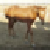

In [52]:
(data, label) = trainset[2000]
print(classes[label])

# (data + 1) / 2是为了还原被归一化的数据
show((data + 1) / 2).resize((50, 50))

Dataloader是一个可迭代的对象，它将dataset返回的每一条数据拼接成一个batch，并提供多线程加速优化和数据打乱等操作。

当程序对dataset的所有数据遍历完一遍之后，相应的对Dataloader也完成了一次迭代。

      horse        frog        deer       horse


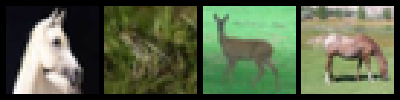

In [53]:
dataiter = iter(trainloader)
images, labels = dataiter.next() # 返回4张图片及标签
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

#### 定义网络

拷贝上面的LeNet网络，修改self.conv1第一个参数为3通道，因CIFAR-10是3通道彩图。

In [54]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.conv2 = nn.Conv2d(6, 16, 5)  
        self.fc1   = nn.Linear(16*5*5, 120)  
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) 
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


#### 定义损失函数和优化器(loss和optimizer)

以交叉熵为损失函数

以Adam为优化函数

In [55]:
from torch import optim
criterion = nn.CrossEntropyLoss() # 交叉熵损失函数
optimizer = t.optim.Adam(net.parameters())
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### 训练网络

所有网络的训练流程都是类似的，不断地执行如下流程：

- 输入数据
- 前向传播+反向传播
- 更新参数

In [56]:
print(len(trainloader))
print(len(trainset))

12500
50000


In [233]:
t.set_num_threads(8)
# 设置checkpoint的模型存放路径
modelfolder = './cifar10/model'
if not os.path.exists(modelfolder):
    os.makedirs(modelfolder)
modelfile = os.path.join(modelfolder, 'cifar10_lenet.pt')
best_acc = 0.
for epoch in range(50):
    print('Epoch: {0} begin'.format(epoch + 1))
    net.train()
    running_loss = 0.0
    train_loss = 0.
    train_acc = 0.
    for i, (inputs, labels) in enumerate(trainloader):
        # 梯度清零
        optimizer.zero_grad()
        # forward + backward 
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        train_loss += loss.data.item()
        pred = t.max(outputs, 1)[1]
        # 通过torch.sum统计预测正确的数量
        train_correct = t.sum(pred == labels)
        # train_correct是Tensor类型，需要通过item()，得到数值
        train_acc += train_correct.item()
#         print('train_correct is {0}/4, total acc: {1}'.format(train_correct, train_acc))
        loss.backward()   
        # 更新参数 
        optimizer.step()
        # 打印log信息
        # loss 是一个scalar,需要使用loss.item()来获取数值，不能使用loss[0]
        running_loss += loss.item()
        if i % 2000 == 1999: # 每2000个batch打印一下训练状态
            print('[%d, %5d] loss: %.3f' \
                  % (epoch+1, i+1, running_loss / (2000 * 4)))
            running_loss = 0.0
    accurate = train_acc / (len(trainset))
    print('Train Loss: {:.6f}, Acc: {:.6f}'.format(train_loss / (len(trainset)), accurate))
    # 如果当前epoch的准确率是最高的，则保存模型。
    # 模型的权重信息是通过state_dict()获得的，这也是模型的最关键信息
    if accurate > best_acc:
        print('save model for best accuate: {0} begin'.format(accurate))
        best_acc = accurate
        t.save({
            'epoch': epoch + 1,
            'state_dict': net.state_dict(),
            'best_acc': best_acc,
        }, modelfile)
        print('save model for best accuate: {0} end'.format(accurate))
    print('Epoch: {0} end'.format(epoch + 1))
print('Finished Training')

Epoch: 1 begin
[1,  2000] loss: 0.293
[1,  4000] loss: 0.296
[1,  6000] loss: 0.294
[1,  8000] loss: 0.285
[1, 10000] loss: 0.286
[1, 12000] loss: 0.283
Train Loss: 0.289488, Acc: 0.589340
save model for best accuate: 0.58934 begin
save model for best accuate: 0.58934 end
Epoch: 1 end
Epoch: 2 begin
[2,  2000] loss: 0.265
[2,  4000] loss: 0.272
[2,  6000] loss: 0.273
[2,  8000] loss: 0.270
[2, 10000] loss: 0.272
[2, 12000] loss: 0.270
Train Loss: 0.270589, Acc: 0.616080
save model for best accuate: 0.61608 begin
save model for best accuate: 0.61608 end
Epoch: 2 end
Epoch: 3 begin
[3,  2000] loss: 0.256
[3,  4000] loss: 0.254
[3,  6000] loss: 0.257
[3,  8000] loss: 0.258
[3, 10000] loss: 0.257
[3, 12000] loss: 0.259
Train Loss: 0.256798, Acc: 0.636320
save model for best accuate: 0.63632 begin
save model for best accuate: 0.63632 end
Epoch: 3 end
Epoch: 4 begin
[4,  2000] loss: 0.242
[4,  4000] loss: 0.244
[4,  6000] loss: 0.243
[4,  8000] loss: 0.248
[4, 10000] loss: 0.251
[4, 12000] l

将测试图片输入到网络中，计算它的label，然后与实际的label进行比较。

In [308]:
def loadmodel():
    modelfolder = './cifar10/model'
    modelfile = os.path.join(modelfolder, 'cifar10_lenet.pt')
    if not os.path.exists(modelfile):
        print('model not exist!')
        return None, None
    print('Loading best model: {0} begin'.format(modelfile))
    mymodel = Net()
    checkpoint = t.load(modelfile)
    epoch = checkpoint['epoch']
    best_acc = checkpoint['best_acc']
    mymodel.load_state_dict(checkpoint['state_dict'])
    print('Loading best model end, epoch is {0}, training accuracy is {1}'.format(epoch, best_acc))
    return mymodel

In [304]:
def getpilimage(image):
    return show((image + 1) / 2).resize((100, 100))

下面是如何使用matplotlib输出图片

In [305]:
def outputimage(images):
    plt.figure("cifar10")
    initplost = 141
    for i in range(4):
        plt.subplot(141 + i)
        plt.imshow(getpilimage(images[i]))
    plt.show()

Loading best model: ./cifar10/model\cifar10_lenet.pt begin
Loading best model end, epoch is 46, training accuracy is 0.77678
Prediction: 1 / 10
实际的label:    cat  ship  ship plane
预测结果:    cat plane plane plane


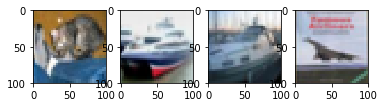

Prediction: 2 / 10
实际的label:   frog  frog   car  frog
预测结果:   frog   cat   dog  frog


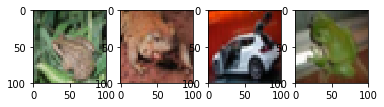

Prediction: 3 / 10
实际的label:    cat   car plane truck
预测结果:    dog   car plane truck


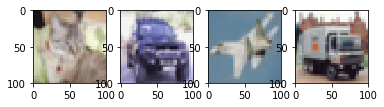

Prediction: 4 / 10
实际的label:    dog horse truck  ship
预测结果:   frog horse truck  ship


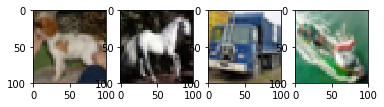

Prediction: 5 / 10
实际的label:    dog horse  ship  frog
预测结果:    dog   cat  ship  frog


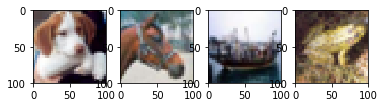

Prediction: 6 / 10
实际的label:  horse plane  deer truck
预测结果:  horse plane  bird   car


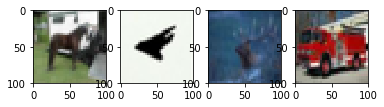

Prediction: 7 / 10
实际的label:    dog  bird  deer plane
预测结果:    dog  bird  deer plane


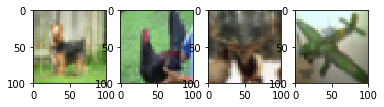

Prediction: 8 / 10
实际的label:  truck  frog  frog   dog
预测结果:  truck  frog  frog   dog


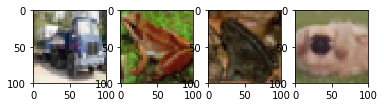

Prediction: 9 / 10
实际的label:   deer   dog truck  bird
预测结果:   bird   cat truck   cat


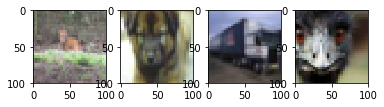

Prediction: 10 / 10
实际的label:   deer   car truck   dog
预测结果:   deer   car truck   dog


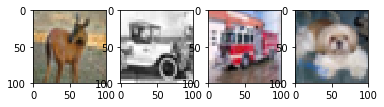

In [309]:
mymodel = loadmodel()
if mymodel:
    mymodel.eval()
    dataiter = iter(testloader)
    predictcount = 10
    with t.no_grad():
        for i in range(predictcount):
            print('Prediction: {0} / {1}'.format(i+1, predictcount))
            images, labels = dataiter.next() # 一个batch返回4张图片
            print('实际的label: ', ' '.join(\
                        '%05s'%classes[labels[j]] for j in range(4)))
            # 计算图片在每个类别上的分数
            outputs = mymodel(images)
    #         outputs = mymodel(images)
            # 得分最高的那个类
            _, predicted = t.max(outputs.data, 1)
            print('预测结果: ', ' '.join('%5s'\
                        % classes[predicted[j]] for j in range(4)))
            outputimage(images)

再来看看在整个测试集上的效果。

In [310]:
correct = 0 # 预测正确的图片数
total = 0 # 总共的图片数
mymodel = loadmodel()
if mymodel:
    mymodel.eval()
    # 由于测试的时候不需要求导，可以暂时关闭autograd，提高速度，节约内存
    with t.no_grad():
        for data in testloader:
            images, labels = data
            outputs = mymodel(images)
            _, predicted = t.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum()

    print('{0}张测试集的准确率为: {1}%'.format(total, 100 * correct / total))

Loading best model: ./cifar10/model\cifar10_lenet.pt begin
Loading best model end, epoch is 46, training accuracy is 0.77678
10000张测试集的准确率为: 60%


如果想获得更好的效果，理论上就是进行更多epoch的训练，即训练更多次。

以上就是PyTorch的基础用法，以及相当简单的通过CNN的LeNet模型，训练及使用Cifar10数据集的例子。